# Tools

## Data preprocessing

Load a month of monthly Neighborhood Patterns, then prepare data for IPF.

In [1]:
# ! conda config --prepend channels conda-forge
# ! conda  install  --strict-channel-priority geopandas  

In [21]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import pandas as pd
# import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load monthly Neighborhood Patterns

#### Asign file locations

In [22]:
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo


# data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Dell 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Dell



# ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"

home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Lenovo
# ACS_file = r"F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv"

# 2018 desktop
save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # 2018 desktop
data_dir = r'D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'    
ACS_file = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
home_panel_fname = f"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"


year = '2023'
month = 6




month_dir = os.path.join(data_dir, str(year), f'{month:02}', '01')
no_dict_colum_fname = os.path.join(save_dir, f"NP_dict_column_{year}_{month:02}.csv")
device_home_areas_fname = os.path.join(save_dir, f"NP_split_device_home_areas_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_CBG_fname     = os.path.join(save_dir, f"adjusted_dwelling_time_stop_CBG_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_national_fname = os.path.join(save_dir, f"adjusted_dwelling_time_stop_national_{year}_{month:02}.csv")
person_per_device_fname = os.path.join(save_dir, f"person_per_device_{year}_{month:02}.csv")
restored_CBG_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_CBG_{year}_{month:02}.csv")
restored_target_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_target_{year}_{month:02}.csv")
CBG_device_stop_destination_distribution_fname  = os.path.join(save_dir, f"CBG_device_stop_destination_distribution_{year}_{month:02}.csv")
CBG_device_stop_origin_distribution_fname = os.path.join(save_dir, f"CBG_device_stop_origin_distribution_{year}_{month:02}.csv")
IPF_results_fname = os.path.join(save_dir, f"IPF_origin_outgoer_hourly_{year}{month:02}.csv")
CBG_hourly_population_fname = os.path.join(save_dir, f"CBG_population_hourly_{year}{month:02}.csv")

CBG_origin_outbound_distribution_sampling_rate_fname = os.path.join(save_dir, f"CBG_origin_outbound_distribution_sampling_rate_{year}{month:02}.csv")
CBG_destination_inbound_per_device_fname = os.path.join(save_dir, f"CBG_destination_inbound_per_device_{year}{month:02}.csv")

CBG_destination_inbound_fname = os.path.join(save_dir, f"CBG_destination_inbound_{year}{month:02}.csv")
inbound_hourly_df_fname = os.path.join(save_dir, f"inbound_hourly_{year}{month:02}.csv")
CBG_agregated_inbound_fname =  os.path.join(save_dir, f"CBG_agregated_inbound_{year}{month:02}.csv")
hourly_agregated_inbound_fname =  os.path.join(save_dir, f"hourly_agregated_inbound_{year}{month:02}.csv")

 
# month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
# CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'


print("Month directory:", month_dir)
print("Save_dir directory:", save_dir)
print("ACS_file:", ACS_file)
print("home_panel file name:", home_panel_fname)

print("No dict colum file name:", no_dict_colum_fname)
print("Device home areas file name:", device_home_areas_fname)
print("Device person_per_device file name:", person_per_device_fname)


print("Device adjusted_dwelling_time_stop_CBG_fname:", adjusted_dwelling_time_stop_CBG_fname)
print("Device adjusted_dwelling_time_stop_national_fname:", adjusted_dwelling_time_stop_national_fname)

print("Restored_hourly_vistor_count_CBG file name:   ", restored_CBG_hourly_vistor_count_fname)
print("Restored_hourly_vistor_count_target file name:", restored_target_hourly_vistor_count_fname)

print("CBG_device_stop_destination_distribution file name:   ", CBG_device_stop_destination_distribution_fname)
print("CBG_device_stop_origin_distribution file name:", CBG_device_stop_origin_distribution_fname)

print("IPF_results file name:", IPF_results_fname)
print("CBG hourly population file name:", CBG_hourly_population_fname)

print("CBG_origin_outbound_distribution_sampling_rate file name:", CBG_origin_outbound_distribution_sampling_rate_fname)


Month directory: D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01
Save_dir directory: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test
ACS_file: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv
home_panel file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip
No dict colum file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\NP_dict_column_2023_06.csv
Device home areas file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\NP_split_device_home_areas_2023_06.csv
Device person_per_device file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\person_per_device_2023_06.csv
Device adj

## Load monthly neighborhood patterns

In [17]:
use_cols =  ['AREA', 
             "DEVICE_HOME_AREAS",
            "STOPS_BY_DAY", 
            "RAW_STOP_COUNTS", 
            "RAW_DEVICE_COUNTS", 
            "MEDIAN_DWELL", 
            "STOPS_BY_EACH_HOUR"]
month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], use_cols=use_cols, verbose=True)
month_df = month_df.sort_values("AREA")
month_df['AREA'] = month_df['AREA'].astype(str).str.zfill(12)
month_df = month_df[use_cols]
month_df

,AREA,DEVICE_HOME_AREAS,STOPS_BY_DAY,RAW_STOP_COUNTS,RAW_DEVICE_COUNTS,MEDIAN_DWELL,STOPS_BY_EACH_HOUR
17609,010010201001,"{""010010201001"":84,""010010208021"":63,""01051031...","[286,254,196,74,246,284,287,227,272,212,249,20...",7936,2601,33.350000,"[0,0,23,0,0,0,0,0,0,0,0,43,23,14,19,0,15,52,22..."
3175,010010201002,"{""010010201002"":132,""010010209002"":21,""0100102...","[248,206,132,132,191,155,156,98,94,172,118,130...",5227,1236,157.716667,"[33,0,0,0,0,0,0,0,0,0,22,21,0,0,21,0,20,43,20,..."
17751,010010202001,"{""010010208012"":71,""010010202001"":71,""01001020...","[229,61,189,267,93,72,191,112,215,177,52,152,5...",5516,1755,40.016667,"[14,24,0,0,0,0,0,0,0,16,0,19,16,0,18,0,22,37,0..."
13849,010010202002,"{""010010205003"":193,""010010205002"":193,""010010...","[1097,900,666,861,707,1145,1070,1164,731,609,7...",31985,8819,10.500000,"[92,20,0,0,0,14,0,153,95,42,61,42,21,52,60,38,..."
10035,010010203001,"{""010010203001"":528,""010010208024"":111,""010010...","[513,618,497,493,552,532,616,685,407,712,900,5...",22648,4942,101.683333,"[0,0,0,0,0,0,0,24,17,0,58,39,40,0,62,18,40,24,..."
...,...,...,...,...,...,...,...
19948,780309611001,"{""780309611001"":39,""780309608001"":21,""78030961...","[305,280,267,197,490,481,484,463,401,229,157,3...",10067,2279,13.533333,"[2,0,0,7,4,4,11,10,16,26,15,16,44,20,17,18,22,..."
20862,780309611002,"{""780309611002"":48,""780309611001"":44,""78030960...","[266,212,246,173,261,247,252,182,190,165,132,2...",6727,1563,11.566667,"[0,0,0,0,0,0,9,16,22,25,13,12,23,18,22,12,21,2..."
17718,780309612001,"{""780309611001"":21,""780309608001"":20,""78030960...","[58,41,28,47,62,50,74,48,23,34,33,40,53,53,69,...",1439,416,42.866667,"[-2,0,0,0,0,0,6,6,3,5,5,-3,2,-3,5,10,6,10,4,-3..."
3191,780309612002,"{""780309611001"":28,""780309611002"":23,""78030960...","[238,239,234,158,280,361,436,343,251,194,130,2...",8328,2040,10.966667,"[-2,0,0,0,6,5,-2,26,11,26,16,10,20,14,10,21,18..."


Explore how to use sochastic simulation

In [18]:
print("RAW_STOP_COUNTS (billion):", month_df['RAW_STOP_COUNTS'].sum() / 1000000000)
print("RAW_DEVICE_COUNTS (billion):", month_df['RAW_DEVICE_COUNTS'].sum() / 1000000000)

RAW_STOP_COUNTS (billion): 4.145658773
RAW_DEVICE_COUNTS (billion): 0.887547318


In [32]:
df = month_df.sample(1)
df

,AREA,DEVICE_HOME_AREAS,STOPS_BY_DAY,RAW_STOP_COUNTS,RAW_DEVICE_COUNTS,MEDIAN_DWELL,STOPS_BY_EACH_HOUR,total_hourly_stop,adjusted_raw_stop
1446,060371065101,"{""060371065101"":11,""060650426191"":7,""060371070...","[115,113,161,218,516,240,670,138,192,154,251,3...",8345,1691,8.883333,"[0,0,0,0,17,0,0,0,22,19,16,0,0,0,0,0,40,0,0,0,...",8198,8198


In [6]:
# df

In [126]:
stop_by_day = json.loads(df.iloc[0]['STOPS_BY_DAY'])
device_home_areas = json.loads(df.iloc[0]['DEVICE_HOME_AREAS'])
stops_by_each_hour = json.loads(df.iloc[0]['STOPS_BY_EACH_HOUR'])

sum(stop_by_day)
# stops_by_each_hour

4147

In [31]:
# len(device_home_areas.keys())
home_CBGs = device_home_areas.keys()
home_CBGs_device_counts = list(device_home_areas.values())
home_CBGs_device_counts_sum = sum(home_CBGs_device_counts)
print("Sum of home_area_device_counts:", home_CBGs_device_counts_sum)
raw_device = df.iloc[0]['RAW_DEVICE_COUNTS']
raw_stop_counts = df.iloc[0]['RAW_STOP_COUNTS']
stop_per_device = raw_stop_counts / raw_device
print("stop_per_device:", stop_per_device)
print("home CBG count:", len(home_CBGs))
 


NameError: name 'device_home_areas' is not defined

In [271]:
stop_home_cnt_list = []
for hour_stop in stops_by_each_hour[7:]:
    print("hour_stop:", hour_stop)
    for home_CBG, device_cnt in device_home_areas.items():
        stop_home_cnt = np.random.binomial(hour_stop, device_cnt/home_CBGs_device_counts_sum, 30)
        stop_home_cnt_list.append(stop_home_cnt)

         
    break

np.array(stop_home_cnt_list).shape
stop_home_cnt_arr = np.array(stop_home_cnt_list)
print("result shape:", stop_home_cnt_arr.shape)  # shape=30
print("simulation mean:", np.array(stop_home_cnt_list).sum(axis=0).mean())
stop_home_cnt_list[0]

hour_stop: 75
result shape: (186, 30)
simulation mean: 76.2


array([4, 0, 1, 0, 1, 3, 4, 5, 3, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1,
       2, 0, 3, 1, 2, 2, 3, 1])

In [219]:
stop_home_cnt_list[0], stop_home_cnt_list[-1], home_CBGs_device_counts[0], home_CBGs_device_counts[-1]

(array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]),
 30,
 4)

In [253]:
stop_home_cnt_arr[:, -1].sum()
stop_home_cnt_arr.sum(axis=0).mean()


8.633333333333333

In [ ]:
home_CBGs_device_counts
home_CBGs
device_home_areas

In [110]:
# print(df.iloc[0]['DEVICE_HOME_AREAS'])

## 

## Check the total of the hourly stops

Usually are 98.9% of the sum of STOPS_BY_EACH_HOUR column

In [76]:
def _get_total_hourly_stop(row):
    # print(row)
    hourly_stop = json.loads(row['STOPS_BY_EACH_HOUR'])
    total_stop = sum(hourly_stop)
    return total_stop

month_df['total_hourly_stop'] = month_df.iloc[:].apply(_get_total_hourly_stop, axis=1)
ratio = month_df['total_hourly_stop'].sum() / month_df['RAW_STOP_COUNTS'].sum()

print("Ratio: total_hourly_stop / RAW_STOP_COUNTS = ", ratio)

# the total_hourly_stop is smaller than the RAW_STOP_COUNTS (98.9%)

Ratio: total_hourly_stop / RAW_STOP_COUNTS =  0.9886882101089896


## Adjust the RAW_STOP_COUNTS by dwellling_time

If a stop dwelling > 60 minutes, we add a stop to the next hours. 

May increase 25% stops.

In [82]:
print("adjusting stops by dwelling time...")
non_adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=month_df.iloc[:], adjust_dwell_time=False, clean_negative=True)
print("sum of non_adjusted_dwell_time_stop_CBG_arr (billion):", non_adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000000)
print("shape of non_adjusted_dwell_time_stop_CBG_arr:", non_adjusted_dwell_time_stop_CBG_arr.shape)

adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=month_df.iloc[:], adjust_dwell_time=True, clean_negative=True)

adjusted_dwell_time_stop_national_arr = adjusted_dwell_time_stop_CBG_arr.sum(axis=0)

month_df['adjusted_raw_stop'] = adjusted_dwell_time_stop_CBG_arr.sum(axis=1)
month_df[['adjusted_raw_stop', 'RAW_STOP_COUNTS']].sum() / 1000000000

print("sum of adjusted_dwell_time_stop_CBG_arr (billion):", adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000000)
print("sum of adjusted_dwell_time_stop_national_arr (billion):", adjusted_dwell_time_stop_national_arr.sum().sum()/1000000000)
print("shape of adjusted_dwell_time_stop_CBG_arr:", adjusted_dwell_time_stop_CBG_arr.shape)

sum of non_adjusted_dwell_time_stop_CBG_arr (billion): 4.099559846
shape of non_adjusted_dwell_time_stop_CBG_arr: (220684, 720)
sum of adjusted_dwell_time_stop_CBG_arr (billion): 5.196196864
sum of adjusted_dwell_time_stop_national_arr (billion): 5.196196864
shape of adjusted_dwell_time_stop_CBG_arr: (220684, 720)


In [113]:
# month_df

###　Save adjusted  RAW_STOP_COUNTS 

In [83]:
# CBG level
hourly_columns = [f'hour_{h+1}' for h in range(adjusted_dwell_time_stop_CBG_arr.shape[1])]
adjusted_dwelling_time_stop_CBG_df = pd.DataFrame(adjusted_dwell_time_stop_CBG_arr, columns=hourly_columns)
adjusted_dwelling_time_stop_CBG_df['CBG'] = month_df['AREA'].astype(str).str.zfill(12).to_list()
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df[['CBG'] + hourly_columns]  # reorder columns
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.sort_values('CBG')

# national level
adjusted_dwelling_time_stop_natinol_df = pd.DataFrame(adjusted_dwell_time_stop_national_arr, columns=['stop'])

adjusted_dwelling_time_stop_CBG_df

,CBG,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456

In [84]:
adjusted_dwelling_time_stop_natinol_df['stop'].sum() / 10**9

5.196196864

In [85]:
# Save CSV files
adjusted_dwelling_time_stop_natinol_df.to_csv(adjusted_dwelling_time_stop_natinol_fname, index=False)
print("Saved national hourly stop at:", adjusted_dwelling_time_stop_national_fname)

print("Saving CBG hourly stop CSV file...")
adjusted_dwelling_time_stop_CBG_df.to_csv(adjusted_dwelling_time_stop_CBG_fname, index=False)
print("Saved CBG hourly stop at:", adjusted_dwelling_time_stop_CBG_fname)

Saved national hourly stop at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\adjusted_dwelling_time_stop_national_2023_06.csv
Saving CBG hourly stop CSV file...
Saved CBG hourly stop at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\adjusted_dwelling_time_stop_CBG_2023_06.csv


In [87]:
print("Total stops (billion):")
adjusted_dwelling_time_stop_natinol_df['stop'].sum() /  10**9, adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() /  10**9


Total stops (billion):


(5.196196864, 5.196196864)

In [89]:
adjusted_dwelling_time_stop_CBG_df

,CBG,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456

In [ ]:
## DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column :  0.8428305449098222
            ## about 85%.

RAW_DEVICE_COUNTS is large than the sum(device) in "DEVICE_HOME_AREAS", result_df['device'].sum() / result_df['RAW_DEVICE_COUNTS'].sum() = 85%

The DEVICE_HOME_AREAS column report less CBGs # thant the RAW_STOP_COUNTS column.

In [80]:
## DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column :  0.8428305449098222
## about 85%.
    
def _sum_home_device_count(row):
    device_home_areas_dict = json.loads(row['DEVICE_HOME_AREAS'])
    total = sum(device_home_areas_dict.values())
    return total

month_df['sum_home_device'] = month_df.progress_apply(_sum_home_device_count, axis=1)

100%|████████████████████████████████████████████████████████████████████████| 220684/220684 [00:25<00:00, 8686.95it/s]


In [90]:
month_df

,AREA,DEVICE_HOME_AREAS,STOPS_BY_DAY,RAW_STOP_COUNTS,RAW_DEVICE_COUNTS,MEDIAN_DWELL,STOPS_BY_EACH_HOUR,total_hourly_stop,sum_home_device,adjusted_raw_stop
17609,010010201001,"{""010010201001"":84,""010010208021"":63,""01051031...","[286,254,196,74,246,284,287,227,272,212,249,20...",7936,2601,33.350000,"[0,0,23,0,0,0,0,0,0,0,0,43,23,14,19,0,15,52,22...",7905,2232,7905
3175,010010201002,"{""010010201002"":132,""010010209002"":21,""0100102...","[248,206,132,132,191,155,156,98,94,172,118,130...",5227,1236,157.716667,"[33,0,0,0,0,0,0,0,0,0,22,21,0,0,21,0,20,43,20,...",5215,1038,15645
17751,010010202001,"{""010010208012"":71,""010010202001"":71,""01001020...","[229,61,189,267,93,72,191,112,215,177,52,152,5...",5516,1755,40.016667,"[14,24,0,0,0,0,0,0,0,16,0,19,16,0,18,0,22,37,0...",5500,1523,5500
13849,010010202002,"{""010010205003"":193,""010010205002"":193,""010010...","[1097,900,666,861,707,1145,1070,1164,731,609,7...",31985,8819,10.500000,"[92,20,0,0,0,14,0,153,95,42,61,42,21,52,60,38,...",31794,7640,31794
10035,010010203001,"{""010010203001"":528,""010010208024"":111,""010010...","[513,618,497,493,552,532,616,685,407,712,900,5...",22648,4942,101.683333,"[0,0,0,0,0,0,0,24,17,0,58,39,40,0,62,18,40,24,...",22464,4561,44928
...,...,...,...,...,...,...,...,...,...,...
19948,780309611001,"{""780309611001"":39,""780309608001"":21,""78030961...","[305,280,267,197,490,481,484,463,401,229,157,3...",10067,2279,13.533333,"[2,0,0,7,4,4,11,10,16,26,15,16,44,20,17,18,22,...",9694,870,9850
20862,780309611002,"{""780309611002"":48,""780309611001"":44,""78030960...","[266,212,246,173,261,247,252,182,190,165,132,2...",6727,1563,11.566667,"[0,0,0,0,0,0,9,16,22,25,13,12,23,18,22,12,21,2...",6336,596,6530
17718,780309612001,"{""780309611001"":21,""780309608001"":20,""78030960...","[58,41,28,47,62,50,74,48,23,34,33,40,53,53,69,...",1439,416,42.866667,"[-2,0,0,0,0,0,6,6,3,5,5,-3,2,-3,5,10,6,10,4,-3...",1115,190,1573
3191,780309612002,"{""780309611001"":28,""780309611002"":23,""78030960...","[238,239,234,158,280,361,436,343,251,194,130,2...",8328,2040,10.966667,"[-2,0,0,0,6,5,-2,26,11,26,16,10,20,14,10,21,18...",8096,501,8300


In [92]:
print("sum of home device count / raw device count:")
month_df['sum_home_device'].sum() / month_df['RAW_DEVICE_COUNTS'].sum()

sum of home device count / raw device count:


0.8377366794093563

In [93]:
(month_df['sum_home_device'] / month_df['RAW_DEVICE_COUNTS']).replace([np.inf, -np.inf], np.nan, inplace=False).dropna().mean()

0.8227918193438897

In [94]:
(month_df['RAW_DEVICE_COUNTS'] == 0).sum(), (month_df['RAW_STOP_COUNTS'] == 0).sum()

(12, 8)

### verify the relationship between raw_device_count and the sum of 720 hours.

In [97]:
print("Make a test...")


df = month_df.query("61 < MEDIAN_DWELL < 63")
# df = month_df.sample(300)

device_home_areas_test_df = ad_op.split_device_home_areas_stops(np_df=df.iloc[:])
result_df = device_home_areas_test_df.groupby('destination', as_index=False)[['stop', 'device']].sum().merge(df, left_on='destination', right_on='AREA').drop(columns='AREA')
# result_df = result_df[['destination', 'stop', 'RAW_STOP_COUNTS']]    # [['AREA', 'RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS']]


stop_diff = result_df['stop'].sum() / result_df['adjusted_raw_stop'].sum()
print("stop_diff ratio: ", stop_diff)

adjusted_diff = result_df['adjusted_raw_stop'].sum() / result_df['RAW_STOP_COUNTS'].sum()
print("adjusted stop diff ratio: ", adjusted_diff)

device_diff = result_df['device'].sum() / result_df['RAW_DEVICE_COUNTS'].sum()
print("DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column （ratio）: ", device_diff)
result_df.head()

Make a test...


2138it [00:00, 3275.31it/s]


Merging columns...
stop_diff ratio:  1.0
adjusted stop diff ratio:  1.968305894356929
DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column （ratio）:  1.0


,destination,stop,device,DEVICE_HOME_AREAS,STOPS_BY_DAY,RAW_STOP_COUNTS,RAW_DEVICE_COUNTS,MEDIAN_DWELL,STOPS_BY_EACH_HOUR,total_hourly_stop,sum_home_device,adjusted_raw_stop
0,010090501013,38650.0,2520.0,"{""010090501013"":417,""010090501014"":111,""010090...","[735,673,282,716,643,436,528,506,622,810,906,3...",19604,2520,62.466667,"[14,22,0,15,0,0,0,0,0,0,32,56,0,74,19,80,185,5...",19325,2366,38650
1,010150012022,36258.0,4009.0,"{""010150012022"":394,""010150011001"":125,""010150...","[626,761,514,570,757,820,1163,850,685,495,487,...",18393,4009,61.833333,"[0,20,0,56,0,0,37,32,13,38,14,16,13,16,54,32,3...",18129,3542,36258
2,010150014001,8668.0,1038.0,"{""010150014001"":45,""011210102011"":22,""01015000...","[128,125,161,185,79,162,92,116,203,92,107,113,...",4472,1038,61.933333,"[18,0,0,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,0,15,0,...",4334,882,8668
3,010179542001,45608.0,1915.0,"{""010179542001"":461,""010179544001"":61,""0108104...","[559,495,643,1371,984,647,725,778,797,374,627,...",23206,1915,62.316667,"[14,0,0,0,21,21,0,36,68,12,33,0,0,19,36,13,34,...",22804,2018,45608
4,010310105003,12168.0,1524.0,"{""010310105003"":15,""010310105002"":4,""010399623...","[188,184,109,149,149,168,91,150,148,361,258,13...",6188,1524,61.266667,"[0,0,0,0,0,0,12,0,0,0,19,8,0,0,8,29,29,41,0,0,...",6084,574,12168


In [ ]:
# device_home_areas_df

### Save the a single CSV for further use, only keep the non-dictionary columns.

In [ ]:
non_dict_columns = ['AREA', 
                    "STOPS_BY_DAY", 
                    "RAW_STOP_COUNTS", 
                    "RAW_DEVICE_COUNTS", 
                    "MEDIAN_DWELL", 
                    "STOPS_BY_EACH_HOUR",
                   'adjusted_raw_stop',
                   ]
# save CSV file
month_df[non_dict_columns].to_csv(no_dict_colum_fname, index=False)
print("Combined CSV wihouth dictionary columns was saved at:", no_dict_colum_fname)

## Split the DEVICE_HOME_AREAS column

Some CBGs are not reported because their visitors < 4, we add them according to the RAW_DEVICE_COUNTS

Note: need > 30 GB memory

In [98]:
## DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column :  0.8428305449098222
## about 85%.
# assumption: in a destination CBG, each device contribute the same stop counts in a month.

device_home_areas_df = ad_op.split_device_home_areas_stops(np_df=month_df.iloc[:])

# print("Sorting...")
## device_home_areas_df = device_home_areas_df.sort_values(['origin', 'destination'])
## device_home_areas_df = device_home_areas_df.sort_values(['origin', 'device'])
# device_home_areas_df['origin'] = device_home_areas_df['origin'].astype(str).str.zfill(12)
# device_home_areas_df['destination'] = device_home_areas_df['destination'].astype(str).str.zfill(12)
## device_home_areas_df['device'] = device_home_areas_df['device'].astype(int)

print(f"Saving at: {device_home_areas_fname}...")
device_home_areas_df.to_csv(device_home_areas_fname, index=False)
print("Done")
device_home_areas_df

220684it [01:47, 2051.80it/s]


Merging columns...
Saving at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\NP_split_device_home_areas_2023_06.csv...
Done


,origin,destination,device,stop
0,010010201001,010010201001,97.887097,297.500000
1,010010208021,010010201001,73.415323,223.125000
2,010510313001,010010201001,61.762097,187.708333
3,010010205001,010010201001,48.943548,148.750000
4,011010059011,010010201001,37.290323,113.333333
...,...,...,...,...
99501279,370810105002,780309900000,7.663866,27.596639
99501280,530330284024,780309900000,7.663866,27.596639
99501281,780309601002,780309900000,7.663866,27.596639
99501282,120860090361,780309900000,7.663866,27.596639


In [100]:
print("summary (billion):")
device_home_areas_df[['device', 'stop']].sum() / 10**9, month_df[['RAW_DEVICE_COUNTS', 'RAW_STOP_COUNTS', 'adjusted_raw_stop']].sum() / 10**9

summary (billion):


(device    0.887546
 stop      5.196190
 dtype: float64,
 RAW_DEVICE_COUNTS    0.887547
 RAW_STOP_COUNTS      4.145659
 adjusted_raw_stop    5.196197
 dtype: float64)

### Save aggregation for origin and destination distribution

In [101]:
# Save aggregation for origin and destination distribution
CBG_device_stop_destination_distribution_df = device_home_areas_df.groupby('destination')[['device', 'stop']].sum()
CBG_device_stop_destination_distribution_df.to_csv(CBG_device_stop_destination_distribution_fname)

CBG_device_stop_origin_distribution_df = device_home_areas_df.groupby('origin')[['device', 'stop']].sum()
CBG_device_stop_origin_distribution_df.to_csv(CBG_device_stop_origin_distribution_fname)

CBG_device_stop_origin_distribution_df

,device,stop
origin,,
010010201001,2133.150088,11778.866131
010010201002,4416.497113,26744.864916
010010202001,2326.502639,13063.070058
010010202002,3612.349983,20646.075626
010010203001,9502.941001,55814.699502
...,...,...
CA:61060145,4.947764,32.678746
CA:61060158,45.079326,209.415291
CA:61060159,361.099883,1459.858534


In [102]:
CBG_device_stop_destination_distribution_df#.reset_index()

,device,stop
destination,,
010010201001,2601.0,7905.0
010010201002,1236.0,15645.0
010010202001,1755.0,5500.0
010010202002,8819.0,31794.0
010010203001,4942.0,44928.0
...,...,...
780309611001,2279.0,9850.0
780309611002,1563.0,6530.0
780309612001,416.0,1573.0


In [103]:
print("Summary (destination and origin suppose to be the same):")
CBG_device_stop_destination_distribution_df.sum()  / 10**9, CBG_device_stop_origin_distribution_df.sum()  / 10**9

Summary (destination and origin suppose to be the same):


(device    0.887546
 stop      5.196190
 dtype: float64,
 device    0.887546
 stop      5.196190
 dtype: float64)

## Generate person_per_device (i.e., device sampling rate) file for origin CBGs

In [107]:
ACS_df = pd.read_csv(ACS_file)
ACS_df["CBG_FIPS"] = ACS_df["fips"].astype(str).str.zfill(12)
print("Total US population (million):",  ACS_df['totalpopulation'].sum() / 10**6)

Total US population (million): 328.016242


In [112]:
print("Loading home panel file:", home_panel_fname)
panel_df = pd.read_csv(home_panel_fname)
panel_df

Loading home panel file: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip


,YEAR,MON,REGION,ISO_COUNTRY_CODE,CENSUS_BLOCK_GROUP,NUMBER_DEVICES_RESIDING,NUMBER_DEVICES_PRIMARY_DAYTIME
0,2021,10,AB,CA,CA:48030119,1.0,NaN
1,2021,10,AB,CA,CA:48060086,1.0,NaN
2,2021,10,AB,CA,CA:48060885,2.0,NaN
3,2021,10,AB,CA,CA:48080254,2.0,NaN
4,2021,10,AB,CA,CA:48110904,1.0,NaN
...,...,...,...,...,...,...,...
15933861,2022,10,YT,CA,CA:60010228,20.0,9.0
15933862,2022,10,YT,CA,CA:60010251,15.0,9.0
15933863,2022,10,YT,CA,CA:60010264,14.0,10.0
15933864,2022,10,YT,CA,CA:60010282,26.0,13.0


In [113]:
monthly_device_cnt_df = panel_df.query(f"ISO_COUNTRY_CODE == 'US' ").groupby(['YEAR', 'MON'], as_index=True)['NUMBER_DEVICES_RESIDING'].sum() / 10**6
print("monthly_device_cnt_df   (million):" )
monthly_device_cnt_df.reset_index()

monthly_device_cnt_df   (million):


,YEAR,MON,NUMBER_DEVICES_RESIDING
0,2019,1,66.145175
1,2019,2,62.823365
2,2019,3,66.860446
3,2019,4,40.499184
4,2019,5,41.970806
5,2019,6,41.172800
6,2019,7,35.953265
7,2019,8,29.020312
8,2019,9,29.037359
9,2019,10,28.627546


The NUMBER_DEVICES_RESIDING surged from 45 million to 900 million, and the sampling rate cannot be obatain, because it exceeds the US population.

In [114]:
target_panel_df = panel_df.query(f"YEAR == {year} and MON == {month} and ISO_COUNTRY_CODE == 'US' ").sort_values('CENSUS_BLOCK_GROUP')  # 
# target_panel_df = panel_df.query(f"YEAR == {year} and MON == {6} and ISO_COUNTRY_CODE == 'US' ").sort_values('CENSUS_BLOCK_GROUP')  # 
print("Total US NUMBER_DEVICES_RESIDING (million):",  target_panel_df['NUMBER_DEVICES_RESIDING'].sum() / 10**6)
target_panel_df

Total US NUMBER_DEVICES_RESIDING (million): 45.306844


,YEAR,MON,REGION,ISO_COUNTRY_CODE,CENSUS_BLOCK_GROUP,NUMBER_DEVICES_RESIDING,NUMBER_DEVICES_PRIMARY_DAYTIME
2164480,2023,6,AL,US,010010201001,61.0,54.0
2165223,2023,6,AL,US,010010201002,134.0,97.0
2164384,2023,6,AL,US,010010202001,42.0,48.0
2166137,2023,6,AL,US,010010202002,85.0,158.0
2164166,2023,6,AL,US,010010203001,274.0,286.0
...,...,...,...,...,...,...,...
2416281,2023,6,VI,US,780309611001,640.0,695.0
2416201,2023,6,VI,US,780309611002,384.0,512.0
2416219,2023,6,VI,US,780309612001,67.0,42.0
2416269,2023,6,VI,US,780309612002,225.0,396.0


In [115]:
panel_ACS_df = target_panel_df.merge(ACS_df[['CBG_FIPS', 'totalpopulation']], left_on='CENSUS_BLOCK_GROUP', right_on='CBG_FIPS')
panel_ACS_df = panel_ACS_df.dropna(subset='NUMBER_DEVICES_RESIDING')
panel_ACS_df['NUMBER_DEVICES_RESIDING'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'].astype(int)
panel_ACS_df = panel_ACS_df.sort_values('CBG_FIPS')
panel_ACS_df['person_per_device'] = panel_ACS_df['totalpopulation'] / panel_ACS_df['NUMBER_DEVICES_RESIDING']
panel_ACS_df['sampling_rate'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'] / panel_ACS_df['totalpopulation']

print("Data cover US population (million) :", panel_ACS_df['totalpopulation'].sum() / 10**6)
panel_ACS_df

Data cover US population (million) : 327.227353


,YEAR,MON,REGION,ISO_COUNTRY_CODE,CENSUS_BLOCK_GROUP,NUMBER_DEVICES_RESIDING,NUMBER_DEVICES_PRIMARY_DAYTIME,CBG_FIPS,totalpopulation,person_per_device,sampling_rate
0,2023,6,AL,US,010010201001,61,54.0,010010201001,730,11.967213,0.083562
1,2023,6,AL,US,010010201002,134,97.0,010010201002,1263,9.425373,0.106097
2,2023,6,AL,US,010010202001,42,48.0,010010202001,835,19.880952,0.050299
3,2023,6,AL,US,010010202002,85,158.0,010010202002,1124,13.223529,0.075623
4,2023,6,AL,US,010010203001,274,286.0,010010203001,2774,10.124088,0.098774
...,...,...,...,...,...,...,...,...,...,...,...
219675,2023,6,PR,US,721537506011,73,85.0,721537506011,883,12.095890,0.082673
219676,2023,6,PR,US,721537506012,244,189.0,721537506012,2523,10.340164,0.096710
219677,2023,6,PR,US,721537506013,134,103.0,721537506013,991,7.395522,0.135217
219678,2023,6,PR,US,721537506021,122,146.0,721537506021,1577,12.926230,0.077362


<AxesSubplot: title={'center': 'Device sampling rate histogram (2023-06)'}, xlabel='Sampling rate', ylabel='CBG count'>

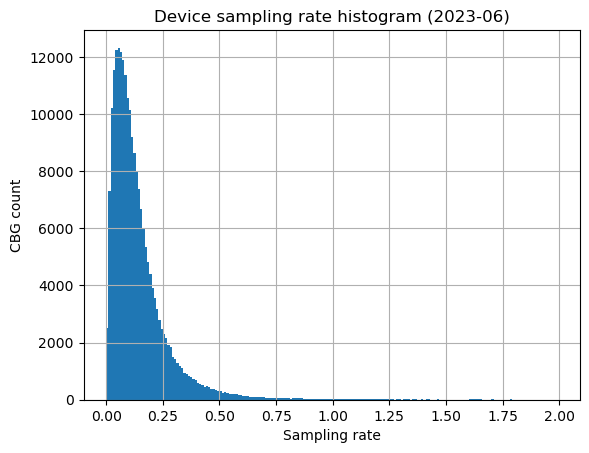

In [116]:
fig, ax = plt.subplots()
month = 6
ax.set_title(f"Device sampling rate histogram ({year}-{month:02})")
ax.set_xlabel("Sampling rate")
ax.set_ylabel("CBG count")

panel_ACS_df.query("totalpopulation > 0  ")['sampling_rate'].dropna().hist(ax=ax, bins=np.array(range(0, 200,1))/100)

In [117]:
# get people_per_device of a county

panel_ACS_df['county_FIPS'] = panel_ACS_df['CBG_FIPS'].str[:5]
sampling_rate_county_df = panel_ACS_df.groupby(['county_FIPS'], as_index=False).agg(    # , 'YEAR', "MON", "REGION", "ISO_COUNTRY_CODE"
    county_device=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_daytime=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_population=('totalpopulation', 'sum'),
    ) 

sampling_rate_county_df['person_per_device_county'] = sampling_rate_county_df['county_device_population'] /  sampling_rate_county_df['county_device']

print("National device and population count:\n")
print(sampling_rate_county_df[['county_device', 'county_device_population']].sum())

people_per_device_df = panel_ACS_df.merge(sampling_rate_county_df, left_on='county_FIPS', right_on='county_FIPS')
people_per_device_df.to_csv(person_per_device_fname, index=False)
people_per_device_df

National device and population count:

county_device                45282809
county_device_population    327227353
dtype: int64


,YEAR,MON,REGION,ISO_COUNTRY_CODE,CENSUS_BLOCK_GROUP,NUMBER_DEVICES_RESIDING,NUMBER_DEVICES_PRIMARY_DAYTIME,CBG_FIPS,totalpopulation,person_per_device,sampling_rate,county_FIPS,county_device,county_device_daytime,county_device_population,person_per_device_county
0,2023,6,AL,US,010010201001,61,54.0,010010201001,730,11.967213,0.083562,01001,8252,8252,55380,6.711100
1,2023,6,AL,US,010010201002,134,97.0,010010201002,1263,9.425373,0.106097,01001,8252,8252,55380,6.711100
2,2023,6,AL,US,010010202001,42,48.0,010010202001,835,19.880952,0.050299,01001,8252,8252,55380,6.711100
3,2023,6,AL,US,010010202002,85,158.0,010010202002,1124,13.223529,0.075623,01001,8252,8252,55380,6.711100
4,2023,6,AL,US,010010203001,274,286.0,010010203001,2774,10.124088,0.098774,01001,8252,8252,55380,6.711100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219119,2023,6,PR,US,721537506011,73,85.0,721537506011,883,12.095890,0.082673,72153,4885,4885,35428,7.252405
219120,2023,6,PR,US,721537506012,244,189.0,721537506012,2523,10.340164,0.096710,72153,4885,4885,35428,7.252405
219121,2023,6,PR,US,721537506013,134,103.0,721537506013,991,7.395522,0.135217,72153,4885,4885,35428,7.252405
219122,2023,6,PR,US,721537506021,122,146.0,721537506021,1577,12.926230,0.077362,72153,4885,4885,35428,7.252405


## Compute the inbounds for each destination CBG

merge the device_home_area and person_per_device, then groupby the destination

In [23]:
device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={"origin":str, "destination":str})
device_home_areas_df

,origin,destination,device,stop
0,010010201001,010010201001,97.887097,297.500000
1,010010208021,010010201001,73.415323,223.125000
2,010510313001,010010201001,61.762097,187.708333
3,010010205001,010010201001,48.943548,148.750000
4,011010059011,010010201001,37.290323,113.333333
...,...,...,...,...
99501279,370810105002,780309900000,7.663866,27.596639
99501280,530330284024,780309900000,7.663866,27.596639
99501281,780309601002,780309900000,7.663866,27.596639
99501282,120860090361,780309900000,7.663866,27.596639


In [24]:
print("summary of device, stop (billion):")
device_home_areas_df[['device', 'stop']].sum() / 10**9

# for 2023-06
# summary of device, stop (billion):
# device    0.887546
# stop      5.196190

summary of device, stop (billion):


device    0.887546
stop      5.196190
dtype: float64

In [25]:
# people_per_device_df = pd.read_csv(person_per_device_fname, index=False)

print("Loading people_per_device_df from:", person_per_device_fname)
person_per_device_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS": str})

print("Total totalpopulation (billion):", person_per_device_df['totalpopulation'].sum() / 10**9)
person_per_device_df

Loading people_per_device_df from: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\person_per_device_2023_06.csv
Total totalpopulation (billion): 0.327227353


,YEAR,MON,REGION,ISO_COUNTRY_CODE,CENSUS_BLOCK_GROUP,NUMBER_DEVICES_RESIDING,NUMBER_DEVICES_PRIMARY_DAYTIME,CBG_FIPS,totalpopulation,person_per_device,sampling_rate,county_FIPS,county_device,county_device_daytime,county_device_population,person_per_device_county
0,2023,6,AL,US,10010201001,61,54.0,010010201001,730,11.967213,0.083562,1001,8252,8252,55380,6.711100
1,2023,6,AL,US,10010201002,134,97.0,010010201002,1263,9.425373,0.106097,1001,8252,8252,55380,6.711100
2,2023,6,AL,US,10010202001,42,48.0,010010202001,835,19.880952,0.050299,1001,8252,8252,55380,6.711100
3,2023,6,AL,US,10010202002,85,158.0,010010202002,1124,13.223529,0.075623,1001,8252,8252,55380,6.711100
4,2023,6,AL,US,10010203001,274,286.0,010010203001,2774,10.124088,0.098774,1001,8252,8252,55380,6.711100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219119,2023,6,PR,US,721537506011,73,85.0,721537506011,883,12.095890,0.082673,72153,4885,4885,35428,7.252405
219120,2023,6,PR,US,721537506012,244,189.0,721537506012,2523,10.340164,0.096710,72153,4885,4885,35428,7.252405
219121,2023,6,PR,US,721537506013,134,103.0,721537506013,991,7.395522,0.135217,72153,4885,4885,35428,7.252405
219122,2023,6,PR,US,721537506021,122,146.0,721537506021,1577,12.926230,0.077362,72153,4885,4885,35428,7.252405


In [26]:
origin_person_per_device_df = device_home_areas_df.merge(person_per_device_df[['CBG_FIPS', 'person_per_device', 'person_per_device_county']], left_on="origin", right_on="CBG_FIPS")
origin_person_per_device_df

,origin,destination,device,stop,CBG_FIPS,person_per_device,person_per_device_county
0,010010201001,010010201001,97.887097,297.500000,010010201001,11.967213,6.711100
1,010010201001,010010201002,10.716763,135.650289,010010201001,11.967213,6.711100
2,010010201001,010010202001,10.370978,32.501641,010010201001,11.967213,6.711100
3,010010201001,010010202002,66.950524,241.368063,010010201001,11.967213,6.711100
4,010010201001,010010203001,26.004824,236.411313,010010201001,11.967213,6.711100
...,...,...,...,...,...,...,...
99219511,721537501012,721537501012,19.687500,283.500000,721537501012,16.240741,7.252405
99219512,721537501012,721537505022,7.103164,27.147180,721537501012,16.240741,7.252405
99219513,721537501021,721537501021,28.137931,258.048276,721537501021,12.633028,7.252405
99219514,721537501021,721537505011,7.366337,36.524752,721537501021,12.633028,7.252405


In [27]:
origin_person_per_device_df['person_CBG_rate'] = origin_person_per_device_df['device'] * origin_person_per_device_df['person_per_device']
origin_person_per_device_df['person_county_rate'] = origin_person_per_device_df['device'] * origin_person_per_device_df['person_per_device_county']
origin_person_per_device_df[['person_CBG_rate','person_county_rate']].sum() / 10**9

person_CBG_rate       9.604674
person_county_rate    8.071316
dtype: float64

In [28]:
# use the device count and person_per_device of the origin CBG to compute the total stops of the month.
# actually, the total visitor count (leave their homes) at every hour in a month
# 61.19985609714279 billion for 2023-06
(origin_person_per_device_df['stop'] * origin_person_per_device_df['person_per_device']).sum() / 10**9

61.19985609714279

In [29]:
# inbound here means the acutal people count
def get_inbound_person_per_device(df):
    inboud_per_per_device_CBG_rate = df['person_CBG_rate'].sum() /  df['device'].sum()
    inboud_per_per_device_county_rate = df['person_county_rate'].sum() /  df['device'].sum()
    return {"inboud_per_device_CBG_rate": inboud_per_per_device_CBG_rate, "inboud_per_device_county_rate": inboud_per_per_device_county_rate}

CBG_destination_inbound_per_device = origin_person_per_device_df.iloc[:].groupby('destination').progress_apply(get_inbound_person_per_device)
CBG_destination_inbound_per_device_df = pd.DataFrame(CBG_destination_inbound_per_device.tolist(), index=CBG_destination_inbound_per_device.index)
CBG_destination_inbound_per_device_df.to_csv(CBG_destination_inbound_per_device_fname)
print(CBG_destination_inbound_per_device_df.mean())
CBG_destination_inbound_per_device_df

 99%|███████████████████████████████████████████████████████████████████████▍| 218842/220494 [01:24<00:00, 3502.56it/s]C:\Users\N\AppData\Local\Temp\ipykernel_12572\2776407810.py:3: RuntimeWarning: invalid value encountered in double_scalars
  inboud_per_per_device_CBG_rate = df['person_CBG_rate'].sum() /  df['device'].sum()
C:\Users\N\AppData\Local\Temp\ipykernel_12572\2776407810.py:4: RuntimeWarning: invalid value encountered in double_scalars
  inboud_per_per_device_county_rate = df['person_county_rate'].sum() /  df['device'].sum()
100%|████████████████████████████████████████████████████████████████████████| 220494/220494 [01:26<00:00, 2558.02it/s]


inboud_per_device_CBG_rate       13.561657
inboud_per_device_county_rate    10.850707
dtype: float64


,inboud_per_device_CBG_rate,inboud_per_device_county_rate
destination,,
010010201001,6.510638,6.292780
010010201002,7.205166,6.256949
010010202001,7.786288,6.350852
010010202002,6.625510,6.397459
010010203001,6.536390,6.150465
...,...,...
780309611001,7.729861,7.581845
780309611002,9.159420,6.982670
780309612001,6.548185,5.688971


In [30]:
print("Loading CBG_destination_inbound_per_device_df from:", CBG_destination_inbound_per_device_fname)
CBG_destination_inbound_per_device_df = pd.read_csv(CBG_destination_inbound_per_device_fname, dtype={"destination": str}).set_index('destination')

print("CBG_destination_inbound_per_device_df.mean(): \n", CBG_destination_inbound_per_device_df.mean() )
CBG_destination_inbound_per_device_df

Loading CBG_destination_inbound_per_device_df from: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\CBG_destination_inbound_per_device_202306.csv
CBG_destination_inbound_per_device_df.mean(): 
 inboud_per_device_CBG_rate       13.561657
inboud_per_device_county_rate    10.850707
dtype: float64


,inboud_per_device_CBG_rate,inboud_per_device_county_rate
destination,,
010010201001,6.510638,6.292780
010010201002,7.205166,6.256949
010010202001,7.786288,6.350852
010010202002,6.625510,6.397459
010010203001,6.536390,6.150465
...,...,...
780309611001,7.729861,7.581845
780309611002,9.159420,6.982670
780309612001,6.548185,5.688971


In [31]:
print("Loading adjusted_dwelling_time_stop_CBG_df from:", adjusted_dwelling_time_stop_CBG_fname)
adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={"CBG": str}).set_index('CBG')

print("Total adjusted hourly stops (billion):", adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() / 10**9)
adjusted_dwelling_time_stop_CBG_df

Loading adjusted_dwelling_time_stop_CBG_df from: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\adjusted_dwelling_time_stop_CBG_2023_06.csv
Total adjusted hourly stops (billion): 5.192881605


,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hou

In [32]:
adjusted_dwelling_time_stop_inbound_per_device_CBG_df = adjusted_dwelling_time_stop_CBG_df.merge(CBG_destination_inbound_per_device_df,left_index=True, right_index=True)
adjusted_dwelling_time_stop_inbound_per_device_CBG_df.index.name = 'CBG'
adjusted_dwelling_time_stop_inbound_per_device_CBG_df

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hou

In [33]:
hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1]
print("hour_cnt:", hour_cnt)

hour_cnt: 720


In [34]:
# inbound_hourly_df.iloc[:, hour]
# inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']

In [36]:

inbound_hourly_df = adjusted_dwelling_time_stop_inbound_per_device_CBG_df.astype(np.float64).copy()

for hour in tqdm(range(hour_cnt)):
    # inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']   # ？ 70.4215236989238 billion
    inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_device_county_rate']   # ？ 56.34291367286323 billion
print("Total restored inbound (billion) using per_device_county_rate:",  inbound_hourly_df.iloc[:, :hour].sum().sum() / 10**9)

inbound_hourly_df = adjusted_dwelling_time_stop_inbound_per_device_CBG_df.astype(np.float64).copy()

for hour in tqdm(range(hour_cnt)):
    inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_device_CBG_rate']   # 70.4215236989238 billion
    # inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_county_rate']   # 56.34291367286323 billion
print("Total restored inbound (billion) using per_device_CBG_rate:",  inbound_hourly_df.iloc[:, :hour].sum().sum() / 10**9)

print("We will use the larger resutls: per_device_CBG_rate.")

print("Saving inbound_hourly_df at:", inbound_hourly_df_fname)
inbound_hourly_df.to_csv(inbound_hourly_df_fname)
inbound_hourly_df

# Total restored inbound (billion) using per_device_county_rate: 51.178735299160714
# Total restored inbound (billion) using per_device_CBG_rate:    61.49318556384339


100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 545.07it/s]


Total restored inbound (billion) using per_device_county_rate: 51.178735299160714


100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 616.21it/s]


Total restored inbound (billion) using per_device_CBG_rate: 61.49318556384339
We will use the larger resutls: per_device_CBG_rate.
Saving inbound_hourly_df at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\inbound_hourly_202306.csv


,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hou

In [37]:
# Get the hourly aggregated inbounds for all CBGs
inbound_hourly_df.iloc[:, :hour_cnt].sum().sum() / 10**9

61.53922122746314

In [38]:
hourly_agregated_inbound_df = pd.DataFrame(inbound_hourly_df.iloc[:, :hour_cnt].sum(), columns=['inboud']).reset_index()[['inboud']]
hourly_agregated_inbound_df.to_csv(hourly_agregated_inbound_fname, index=False)
print("Save hourly_agregated_inbound_df at:", hourly_agregated_inbound_fname)

CBG_agregated_inbound_df = pd.DataFrame(inbound_hourly_df.iloc[:, :hour_cnt].sum(axis=1), columns=['inboud'])
CBG_agregated_inbound_df.to_csv(CBG_agregated_inbound_fname)
print("Save CBG_agregated_inbound_df at:", CBG_agregated_inbound_fname)

Save hourly_agregated_inbound_df at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\hourly_agregated_inbound_202306.csv
Save CBG_agregated_inbound_df at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\CBG_agregated_inbound_202306.csv


In [39]:
hourly_agregated_inbound_df

,inboud
0,4.497873e+07
1,3.505929e+07
2,3.174563e+07
3,3.273093e+07
4,3.931367e+07
...,...
715,1.135927e+08
716,9.902240e+07
717,8.276372e+07
718,6.609113e+07


In [40]:
CBG_agregated_inbound_df['inboud'].sum() / 10**9

61.53922122746314

In [41]:
people_per_device_df = pd.read_csv(person_per_device_fname, dtype={'CBG_FIPS': str})
people_per_device_df

,YEAR,MON,REGION,ISO_COUNTRY_CODE,CENSUS_BLOCK_GROUP,NUMBER_DEVICES_RESIDING,NUMBER_DEVICES_PRIMARY_DAYTIME,CBG_FIPS,totalpopulation,person_per_device,sampling_rate,county_FIPS,county_device,county_device_daytime,county_device_population,person_per_device_county
0,2023,6,AL,US,10010201001,61,54.0,010010201001,730,11.967213,0.083562,1001,8252,8252,55380,6.711100
1,2023,6,AL,US,10010201002,134,97.0,010010201002,1263,9.425373,0.106097,1001,8252,8252,55380,6.711100
2,2023,6,AL,US,10010202001,42,48.0,010010202001,835,19.880952,0.050299,1001,8252,8252,55380,6.711100
3,2023,6,AL,US,10010202002,85,158.0,010010202002,1124,13.223529,0.075623,1001,8252,8252,55380,6.711100
4,2023,6,AL,US,10010203001,274,286.0,010010203001,2774,10.124088,0.098774,1001,8252,8252,55380,6.711100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219119,2023,6,PR,US,721537506011,73,85.0,721537506011,883,12.095890,0.082673,72153,4885,4885,35428,7.252405
219120,2023,6,PR,US,721537506012,244,189.0,721537506012,2523,10.340164,0.096710,72153,4885,4885,35428,7.252405
219121,2023,6,PR,US,721537506013,134,103.0,721537506013,991,7.395522,0.135217,72153,4885,4885,35428,7.252405
219122,2023,6,PR,US,721537506021,122,146.0,721537506021,1577,12.926230,0.077362,72153,4885,4885,35428,7.252405


In [42]:
# Load flow data (month)
# device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={'origin':str, 'destination':str})
device_home_areas_df

,origin,destination,device,stop
0,010010201001,010010201001,97.887097,297.500000
1,010010208021,010010201001,73.415323,223.125000
2,010510313001,010010201001,61.762097,187.708333
3,010010205001,010010201001,48.943548,148.750000
4,011010059011,010010201001,37.290323,113.333333
...,...,...,...,...
99501279,370810105002,780309900000,7.663866,27.596639
99501280,530330284024,780309900000,7.663866,27.596639
99501281,780309601002,780309900000,7.663866,27.596639
99501282,120860090361,780309900000,7.663866,27.596639


In [43]:
device_home_areas_person_per_device_df = device_home_areas_df.merge(people_per_device_df[['CBG_FIPS', 'person_per_device', 'person_per_device_county']], left_on='origin', right_on='CBG_FIPS')
device_home_areas_person_per_device_df

,origin,destination,device,stop,CBG_FIPS,person_per_device,person_per_device_county
0,010010201001,010010201001,97.887097,297.500000,010010201001,11.967213,6.711100
1,010010201001,010010201002,10.716763,135.650289,010010201001,11.967213,6.711100
2,010010201001,010010202001,10.370978,32.501641,010010201001,11.967213,6.711100
3,010010201001,010010202002,66.950524,241.368063,010010201001,11.967213,6.711100
4,010010201001,010010203001,26.004824,236.411313,010010201001,11.967213,6.711100
...,...,...,...,...,...,...,...
99219511,721537501012,721537501012,19.687500,283.500000,721537501012,16.240741,7.252405
99219512,721537501012,721537505022,7.103164,27.147180,721537501012,16.240741,7.252405
99219513,721537501021,721537501021,28.137931,258.048276,721537501021,12.633028,7.252405
99219514,721537501021,721537505011,7.366337,36.524752,721537501021,12.633028,7.252405


In [44]:
device_home_areas_person_per_device_df['stop'].sum() / 10**9, device_home_areas_person_per_device_df['device'].sum() / 10**9

(5.182593093173373, 0.8855341314235072)

In [45]:
# Not correct
# device_home_areas_person_per_device_df['outbound'] = device_home_areas_person_per_device_df['stop'] * device_home_areas_person_per_device_df['person_per_device']
# device_home_areas_person_per_device_df['outbound'].sum()  / 10**9

In [46]:
no_dict_colum_month_df = pd.read_csv(no_dict_colum_fname, dtype={"AREA":str})
no_dict_colum_month_df['destination'] = no_dict_colum_month_df['AREA'].astype(str).str.zfill(12)
no_dict_colum_month_df

,AREA,STOPS_BY_DAY,RAW_STOP_COUNTS,RAW_DEVICE_COUNTS,MEDIAN_DWELL,STOPS_BY_EACH_HOUR,adjusted_raw_stop,destination
0,010010201001,"[286,254,196,74,246,284,287,227,272,212,249,20...",7936,2601,33.350000,"[0,0,23,0,0,0,0,0,0,0,0,43,23,14,19,0,15,52,22...",7905,010010201001
1,010010201002,"[248,206,132,132,191,155,156,98,94,172,118,130...",5227,1236,157.716667,"[33,0,0,0,0,0,0,0,0,0,22,21,0,0,21,0,20,43,20,...",15645,010010201002
2,010010202001,"[229,61,189,267,93,72,191,112,215,177,52,152,5...",5516,1755,40.016667,"[14,24,0,0,0,0,0,0,0,16,0,19,16,0,18,0,22,37,0...",5500,010010202001
3,010010202002,"[1097,900,666,861,707,1145,1070,1164,731,609,7...",31985,8819,10.500000,"[92,20,0,0,0,14,0,153,95,42,61,42,21,52,60,38,...",31794,010010202002
4,010010203001,"[513,618,497,493,552,532,616,685,407,712,900,5...",22648,4942,101.683333,"[0,0,0,0,0,0,0,24,17,0,58,39,40,0,62,18,40,24,...",44928,010010203001
...,...,...,...,...,...,...,...,...
220679,780309611001,"[305,280,267,197,490,481,484,463,401,229,157,3...",10067,2279,13.533333,"[2,0,0,7,4,4,11,10,16,26,15,16,44,20,17,18,22,...",9850,780309611001
220680,780309611002,"[266,212,246,173,261,247,252,182,190,165,132,2...",6727,1563,11.566667,"[0,0,0,0,0,0,9,16,22,25,13,12,23,18,22,12,21,2...",6530,780309611002
220681,780309612001,"[58,41,28,47,62,50,74,48,23,34,33,40,53,53,69,...",1439,416,42.866667,"[-2,0,0,0,0,0,6,6,3,5,5,-3,2,-3,5,10,6,10,4,-3...",1573,780309612001
220682,780309612002,"[238,239,234,158,280,361,436,343,251,194,130,2...",8328,2040,10.966667,"[-2,0,0,0,6,5,-2,26,11,26,16,10,20,14,10,21,18...",8300,780309612002


In [47]:
no_dict_colum_month_df['adjusted_raw_stop'].sum() / 10**9

5.196196864

In [48]:
# device_home_areas_person_per_device_df.groupby('destination', as_index=False)#[['inbound']] .sum()
device_home_areas_person_per_device_df

,origin,destination,device,stop,CBG_FIPS,person_per_device,person_per_device_county
0,010010201001,010010201001,97.887097,297.500000,010010201001,11.967213,6.711100
1,010010201001,010010201002,10.716763,135.650289,010010201001,11.967213,6.711100
2,010010201001,010010202001,10.370978,32.501641,010010201001,11.967213,6.711100
3,010010201001,010010202002,66.950524,241.368063,010010201001,11.967213,6.711100
4,010010201001,010010203001,26.004824,236.411313,010010201001,11.967213,6.711100
...,...,...,...,...,...,...,...
99219511,721537501012,721537501012,19.687500,283.500000,721537501012,16.240741,7.252405
99219512,721537501012,721537505022,7.103164,27.147180,721537501012,16.240741,7.252405
99219513,721537501021,721537501021,28.137931,258.048276,721537501021,12.633028,7.252405
99219514,721537501021,721537505011,7.366337,36.524752,721537501021,12.633028,7.252405


In [49]:
destination_CBG_inbound_df = device_home_areas_person_per_device_df.groupby('destination', as_index=False)[['stop']].sum()#.sum()
destination_CBG_inbound_df['destination'] = destination_CBG_inbound_df['destination'].astype(str).str.zfill(12)

destination_CBG_inbound_device_device_count_df = destination_CBG_inbound_df.merge(no_dict_colum_month_df[['destination', 'RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS', 'MEDIAN_DWELL']],
                                                                                 left_on="destination",
                                                                                 right_on="destination")

destination_CBG_inbound_device_device_count_df['inbound_per_stop'] = destination_CBG_inbound_device_device_count_df['stop'] / destination_CBG_inbound_device_device_count_df['RAW_STOP_COUNTS']
destination_CBG_inbound_device_device_count_df

,destination,stop,RAW_STOP_COUNTS,RAW_DEVICE_COUNTS,MEDIAN_DWELL,inbound_per_stop
0,010010201001,7905.000000,7936,2601,33.350000,0.996094
1,010010201002,15645.000000,5227,1236,157.716667,2.993113
2,010010202001,5500.000000,5516,1755,40.016667,0.997099
3,010010202002,31748.223298,31985,8819,10.500000,0.992597
4,010010203001,44928.000000,22648,4942,101.683333,1.983751
...,...,...,...,...,...,...
220489,780309611001,7132.758621,10067,2279,13.533333,0.708529
220490,780309611002,3034.916107,6727,1563,11.566667,0.451154
220491,780309612001,298.042105,1439,416,42.866667,0.207118
220492,780309612002,4787.824351,8328,2040,10.966667,0.574907


In [51]:
destination_CBG_inbound_device_device_count_df['inbound'] = destination_CBG_inbound_device_device_count_df['stop'] * destination_CBG_inbound_device_device_count_df['inbound_per_stop']

destination_CBG_inbound_device_device_count_df['inbound'].sum() / 1000000000, destination_CBG_inbound_device_device_count_df['RAW_STOP_COUNTS'].sum() / 1000000000

(16.454163853988693, 4.145487351)

In [ ]:
destination_CBG_inbound_device_device_count_df.to_csv(CBG_destination_inbound_fname, index=False)
print("Saved destination_CBG_inbound_device_device_count_df as:", CBG_destination_inbound_fname)
destination_CBG_inbound_device_device_count_df

In [ ]:
destination_CBG_inbound_device_device_count_df['inbound'].sum() / 1000000000

## Compute the hourly inbound (not used, not correct)

In [ ]:
destination_CBG_inbound_df = pd.read_csv(CBG_destination_inbound_fname, dtype={'destination':str})
destination_CBG_inbound_df

In [ ]:
destination_CBG_inbound_df.sample(30)['inbound_per_stop']#.mean()

In [ ]:
print("Loading in adjusted_dwelling_time_stop_CBG_df from:", adjusted_dwelling_time_stop_CBG_fname)
adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={'CBG':str})
print("Total adjusted observed stop (billion):", adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() / 1000000000)
adjusted_dwelling_time_stop_CBG_df

In [ ]:
hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1] - 1
print("hour_cnt:", hour_cnt)

In [ ]:
adjusted_stop_inbound_per_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.merge(destination_CBG_inbound_df[['destination','inbound_per_stop']],
                                                                                left_on="CBG",
                                                                                right_on="destination",
                                                                                )
adjusted_stop_inbound_per_stop_CBG_df

In [ ]:
hourly_inbound_df = adjusted_stop_inbound_per_stop_CBG_df.copy()
for h in range(hour_cnt):
    hourly_inbound_df.iloc[:, h + 1] = hourly_inbound_df.iloc[:, h + 1] * hourly_inbound_df['inbound_per_stop']  

hourly_inbound_df = hourly_inbound_df.iloc[:, :-2]
print("Total inbound (billion):", hourly_inbound_df.iloc[:, 1:].sum().sum() / 1000000000)
hourly_inbound_df

In [ ]:
hourly_inbound_df.iloc[:, 1:].sum().sum()

# IPF  v2

### Restored the outbound according to device sampling rate

In [52]:
CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname)
print("Total observed stops (billion): ", CBG_device_stop_origin_distribution_df['stop'].sum() / 1000000000)
CBG_device_stop_origin_distribution_df

Total observed stops (billion):  5.196190454


,origin,device,stop
0,010010201001,2133.150088,11778.866131
1,010010201002,4416.497113,26744.864916
2,010010202001,2326.502639,13063.070058
3,010010202002,3612.349983,20646.075626
4,010010203001,9502.941001,55814.699502
...,...,...,...
230742,CA:61060145,4.947764,32.678746
230743,CA:61060158,45.079326,209.415291
230744,CA:61060159,361.099883,1459.858534
230745,CA:62040060,16.555032,102.423165


In [53]:
people_per_device_df = pd.read_csv(person_per_device_fname, dtype={'CBG_FIPS': str})
people_per_device_df

,YEAR,MON,REGION,ISO_COUNTRY_CODE,CENSUS_BLOCK_GROUP,NUMBER_DEVICES_RESIDING,NUMBER_DEVICES_PRIMARY_DAYTIME,CBG_FIPS,totalpopulation,person_per_device,sampling_rate,county_FIPS,county_device,county_device_daytime,county_device_population,person_per_device_county
0,2023,6,AL,US,10010201001,61,54.0,010010201001,730,11.967213,0.083562,1001,8252,8252,55380,6.711100
1,2023,6,AL,US,10010201002,134,97.0,010010201002,1263,9.425373,0.106097,1001,8252,8252,55380,6.711100
2,2023,6,AL,US,10010202001,42,48.0,010010202001,835,19.880952,0.050299,1001,8252,8252,55380,6.711100
3,2023,6,AL,US,10010202002,85,158.0,010010202002,1124,13.223529,0.075623,1001,8252,8252,55380,6.711100
4,2023,6,AL,US,10010203001,274,286.0,010010203001,2774,10.124088,0.098774,1001,8252,8252,55380,6.711100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219119,2023,6,PR,US,721537506011,73,85.0,721537506011,883,12.095890,0.082673,72153,4885,4885,35428,7.252405
219120,2023,6,PR,US,721537506012,244,189.0,721537506012,2523,10.340164,0.096710,72153,4885,4885,35428,7.252405
219121,2023,6,PR,US,721537506013,134,103.0,721537506013,991,7.395522,0.135217,72153,4885,4885,35428,7.252405
219122,2023,6,PR,US,721537506021,122,146.0,721537506021,1577,12.926230,0.077362,72153,4885,4885,35428,7.252405


In [54]:
CBG_origin_stop_distribution_sampling_rate_df = CBG_device_stop_origin_distribution_df.merge(people_per_device_df, left_on='origin', right_on='CBG_FIPS')
CBG_origin_stop_distribution_sampling_rate_df

,origin,device,stop,YEAR,MON,REGION,ISO_COUNTRY_CODE,CENSUS_BLOCK_GROUP,NUMBER_DEVICES_RESIDING,NUMBER_DEVICES_PRIMARY_DAYTIME,CBG_FIPS,totalpopulation,person_per_device,sampling_rate,county_FIPS,county_device,county_device_daytime,county_device_population,person_per_device_county
0,010010201001,2133.150088,11778.866131,2023,6,AL,US,10010201001,61,54.0,010010201001,730,11.967213,0.083562,1001,8252,8252,55380,6.711100
1,010010201002,4416.497113,26744.864916,2023,6,AL,US,10010201002,134,97.0,010010201002,1263,9.425373,0.106097,1001,8252,8252,55380,6.711100
2,010010202001,2326.502639,13063.070058,2023,6,AL,US,10010202001,42,48.0,010010202001,835,19.880952,0.050299,1001,8252,8252,55380,6.711100
3,010010202002,3612.349983,20646.075626,2023,6,AL,US,10010202002,85,158.0,010010202002,1124,13.223529,0.075623,1001,8252,8252,55380,6.711100
4,010010203001,9502.941001,55814.699502,2023,6,AL,US,10010203001,274,286.0,010010203001,2774,10.124088,0.098774,1001,8252,8252,55380,6.711100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218938,721537506011,21.059649,168.086717,2023,6,PR,US,721537506011,73,85.0,721537506011,883,12.095890,0.082673,72153,4885,4885,35428,7.252405
218939,721537506012,91.751630,803.649347,2023,6,PR,US,721537506012,244,189.0,721537506012,2523,10.340164,0.096710,72153,4885,4885,35428,7.252405
218940,721537506013,59.201404,312.785799,2023,6,PR,US,721537506013,134,103.0,721537506013,991,7.395522,0.135217,72153,4885,4885,35428,7.252405
218941,721537506021,65.596146,574.634552,2023,6,PR,US,721537506021,122,146.0,721537506021,1577,12.926230,0.077362,72153,4885,4885,35428,7.252405


Because "stop" is the combination of visitors from various HOME CBGs! So, we need to compute the inbound. 

The outbound compuated below can be view as the distribution only.

In [55]:
person_per_device_national = CBG_origin_stop_distribution_sampling_rate_df['totalpopulation'].sum() / CBG_origin_stop_distribution_sampling_rate_df['NUMBER_DEVICES_RESIDING'].sum()
CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * person_per_device_national
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() /  10**9
print("Restored total outbound distribution (billion) using national sampling rate:", restored_total_restored_outbound_count)  # 37.44716723845148 billion

CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * CBG_origin_stop_distribution_sampling_rate_df['person_per_device_county']
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() /  10**9
print("Restored total outbound distribution (billion) using county sampling rate:", restored_total_restored_outbound_count)  # 50.96843487672891 billion

CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * CBG_origin_stop_distribution_sampling_rate_df['person_per_device']
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() / 10**9
CBG_origin_stop_distribution_sampling_rate_df.to_csv(CBG_origin_outbound_distribution_sampling_rate_fname, index=False)
print("Restored total outbound distribution (billion) using CBG sampling rate:", restored_total_restored_outbound_count)  # 61.19985609714293 billion

print("Saved CBG_origin_outbound_distribution_sampling_rate at:", CBG_origin_outbound_distribution_sampling_rate_fname)

Restored total outbound distribution (billion) using national sampling rate: 37.44716723845148
Restored total outbound distribution (billion) using county sampling rate: 50.96843487672891
Restored total outbound distribution (billion) using CBG sampling rate: 61.19985609714293
Saved CBG_origin_outbound_distribution_sampling_rate at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\CBG_origin_outbound_distribution_sampling_rate_202306.csv


In [56]:
# use the total_inboud to calibrate the outbound

# restored_outbound_count

## Load data

In [57]:
hourly_agregated_inbound_df = pd.read_csv(hourly_agregated_inbound_fname)
total_inbound = hourly_agregated_inbound_df['inboud'].sum()
print("total_inbound (billion):", total_inbound / 10**9)

total_inbound (billion): 61.53922122746314


In [58]:
# hourly_agregated_inbound_df

In [59]:
CBG_restored_origin_outbound_df = pd.read_csv(CBG_origin_outbound_distribution_sampling_rate_fname)
total_outbound = CBG_restored_origin_outbound_df['restored_outbound_count'].sum()
print("Total outbound distribution (billions): ",  total_outbound / 1000000000)


factor = total_inbound / total_outbound
print("factor:", factor)


CBG_restored_origin_outbound_df['restored_outbound_count'] = CBG_restored_origin_outbound_df['restored_outbound_count'] * factor

print("Total outbound distribution (billions): ",   CBG_restored_origin_outbound_df['restored_outbound_count'].sum() / 10**9)

Total outbound distribution (billions):  61.19985609714293
factor: 1.0055451949066927
Total outbound distribution (billions):  61.539221227463116


In [60]:
CBG_restored_origin_outbound_df.shape

(218943, 20)

In [61]:
# Load 

In [62]:
# adjusted_dwelling_time_stop_natinol_df = pd.read_csv(adjusted_dwelling_time_stop_natinol_fname)
# total_adjusted_stops = adjusted_dwelling_time_stop_natinol_df['stop'].sum()
# print("total_adjusted_stops (billion):", total_adjusted_stops / 1000000000)

# # covnert distribution to acution outbound
# outbound_per_stop = total_outbound / total_adjusted_stops 

# adjusted_dwelling_time_stop_natinol_df['stop'] *= outbound_per_stop
# print("total outbouds (billion):", adjusted_dwelling_time_stop_natinol_df['stop'].sum() / 1000000000)

### start IPF

In [2]:
# ! pip install ipfn

# import ipfn

ModuleNotFoundError: No module named 'ipfn'

In [69]:
import numpy as np
from ipfn import ipfn

restored_CBG_outbound_arr = CBG_restored_origin_outbound_df['restored_outbound_count'].to_numpy()
restored_hourly_outbound_arr = hourly_agregated_inbound_df['inboud'].to_numpy()  # 

aggregates = [restored_CBG_outbound_arr, restored_hourly_outbound_arr]
dimensions = [[0], [1]]

seed_arr = np.ones((len(restored_CBG_outbound_arr), len(restored_hourly_outbound_arr)))

IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-3)
m = IPF.iteration()
print(m.shape)

ModuleNotFoundError: No module named 'ipfn'

In [ ]:
print("Error of IPF:")
print((m.sum(axis=1) - restored_CBG_outbound_arr).sum(), (m.sum(axis=0) - restored_hourly_outbound_arr).sum())

In [ ]:
(m.sum(axis=1) - restored_CBG_outbound_arr).max(), (m.sum(axis=0) - restored_hourly_outbound_arr).max()

In [ ]:
(m.sum(axis=1) - restored_CBG_outbound_arr).min(), (m.sum(axis=0) - restored_hourly_outbound_arr).min()

In [ ]:
# Save IPF results
hourly_columns = [f'hour_{h+1}' for h in range(restored_hourly_outbound_arr.shape[0])]
IPF_df = pd.DataFrame(m, columns=hourly_columns)
print("Total outbound visitor (billion):", IPF_df.sum().sum() / 1000000000)

 
IPF_df['CBG'] = CBG_restored_origin_outbound_df['origin'].astype(str).str.zfill(12)
IPF_df = IPF_df[['CBG'] + hourly_columns]

print("Saving IPF at:", IPF_results_fname)
IPF_df.to_csv(IPF_results_fname, index=False)
print("Saved IPF_results at:", IPF_results_fname)
IPF_df

In [ ]:
Not use below

##	Adjust stop count by dwelling time

Load the raw stop data and Neighorhood Patterns table.

In [ ]:
# Load the raw stop data and Neighorhood Patterns table.

# device_home_areas_df = pd.read_csv(device_home_areas_fname)
# print("Loading no_dict_colum CSV file:", no_dict_colum_fname)
no_dict_colum_df = pd.read_csv(no_dict_colum_fname)

no_dict_colum_df

In [ ]:
# non_adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=no_dict_colum_df.iloc[:], adjust_dwell_time=False, clean_negative=True)
# print("sum of non_adjusted_dwell_time_stop_CBG_arr (million):", non_adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000)
# print("shape of non_adjusted_dwell_time_stop_CBG_arr:", non_adjusted_dwell_time_stop_CBG_arr.shape)

In [ ]:
# adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=no_dict_colum_df.iloc[:], adjust_dwell_time=True, clean_negative=True)

# adjusted_dwell_time_stop_national_arr = adjusted_dwell_time_stop_CBG_arr.sum(axis=0)

# print("sum of adjusted_dwell_time_stop_CBG_arr (million):", adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000)
# print("sum of adjusted_dwell_time_stop_national_arr (million):", adjusted_dwell_time_stop_national_arr.sum().sum()/1000000)
# print("shape of adjusted_dwell_time_stop_CBG_arr:", adjusted_dwell_time_stop_CBG_arr.shape)

In [ ]:
# hourly_columns
# adjusted_dwell_time_stop_national_arr.shape

Convert numpy array to DataFrame

In [ ]:
# convert numpy array to DataFrame
# CBG level
hourly_columns = [f'hour_{h+1}' for h in range(adjusted_dwell_time_stop_CBG_arr.shape[1])]
adjusted_dwelling_time_stop_CBG_df = pd.DataFrame(adjusted_dwell_time_stop_CBG_arr, columns=hourly_columns)
adjusted_dwelling_time_stop_CBG_df['CBG'] = no_dict_colum_df['AREA'].astype(str).str.zfill(12).to_list()
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df[['CBG'] + hourly_columns]  # reorder columns
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.sort_values('CBG')


# national level
adjusted_dwelling_time_stop_natinol_df = pd.DataFrame(adjusted_dwell_time_stop_national_arr, columns=['stop'])

adjusted_dwelling_time_stop_CBG_df

In [ ]:
print("Adjustted total stop (billion) by dwelling time from CBG and national level (should be the same):")
print(adjusted_dwelling_time_stop_CBG_df[hourly_columns].sum().sum() / 1000000000,  adjusted_dwelling_time_stop_natinol_df.sum().sum()/ 1000000000)

In [ ]:
# Save CSV files
adjusted_dwelling_time_stop_natinol_df.to_csv(adjusted_dwelling_time_stop_natinol_fname, index=False)
print("Saved national hourly stop at:", adjusted_dwelling_time_stop_natinol_fname)

adjusted_dwelling_time_stop_CBG_df.to_csv(adjusted_dwelling_time_stop_CBG_fname, index=False)
print("Saved CBG hourly stop at:", adjusted_dwelling_time_stop_CBG_fname)

###  Convert observed stop counts to actual visitor counts.

#### compute the person_per_device at CBG and county level

Load ACS and home panel data, merge them into device sampling rate table at CBG and county level

In [ ]:
ACS_df = pd.read_csv(ACS_file)
ACS_df["CBG_FIPS"] = ACS_df["fips"].astype(str).str.zfill(12)
print("Total US population (million):",  ACS_df['totalpopulation'].sum() / 1000000)

In [ ]:
print("Loading home panel file:", home_panel_fname)
panel_df = pd.read_csv(home_panel_fname)
target_panel_df = panel_df.query(f"YEAR == {year} and MON == {int(month)} and ISO_COUNTRY_CODE == 'US' ")
target_panel_df

In [ ]:
panel_ACS_df = target_panel_df.merge(ACS_df[['CBG_FIPS', 'totalpopulation']], left_on='CENSUS_BLOCK_GROUP', right_on='CBG_FIPS')
panel_ACS_df = panel_ACS_df.dropna(subset='NUMBER_DEVICES_RESIDING')
panel_ACS_df['NUMBER_DEVICES_RESIDING'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'].astype(int)
panel_ACS_df = panel_ACS_df.sort_values('CBG_FIPS')
panel_ACS_df['person_per_device'] = panel_ACS_df['totalpopulation'] / panel_ACS_df['NUMBER_DEVICES_RESIDING']
print("Data cover US population:", panel_ACS_df['totalpopulation'].sum())
panel_ACS_df

In [ ]:
# get people_per_device of a county

panel_ACS_df['county_FIPS'] = panel_ACS_df['CBG_FIPS'].str[:5]
sampling_rate_county_df = panel_ACS_df.groupby(['county_FIPS'], as_index=False).agg(    # , 'YEAR', "MON", "REGION", "ISO_COUNTRY_CODE"
    county_device=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_daytime=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_population=('totalpopulation', 'sum'),
    ) 

sampling_rate_county_df['person_per_device_county'] = sampling_rate_county_df['county_device_population'] /  sampling_rate_county_df['county_device']

print("National device and population count:\n")
print(sampling_rate_county_df[['county_device', 'county_device_population']].sum())

people_per_device_df = panel_ACS_df.merge(sampling_rate_county_df, left_on='county_FIPS', right_on='county_FIPS')
people_per_device_df.to_csv(person_per_device_fname, index=False)
people_per_device_df

#### restore the observated stop count to actual visitor count

In [ ]:
people_per_device_df = pd.read_csv(person_per_device_fname, dtype={'CBG_FIPS': str})
adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={'CBG':str})

In [ ]:
adjusted_dwelling_time_stop_CBG_df
# people_per_device_df

In [ ]:
adjusted_dwelling_time_stop_CBG_df.shape

## Get the total outgoer

In [ ]:
device_home_areas_df = pd.read_csv(device_home_areas_fname)
device_home_areas_df

In [ ]:
# Assume a stop is a device
hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1] - 1


hourly_stop_sampling_rate_df = adjusted_dwelling_time_stop_CBG_df.merge(people_per_device_df, left_on='CBG', right_on='CBG_FIPS')
national_people_per_device = hourly_stop_sampling_rate_df['totalpopulation'].sum() / hourly_stop_sampling_rate_df['NUMBER_DEVICES_RESIDING'].sum()

print("hour_cnt:", hour_cnt)
print("national_people_per_device:", national_people_per_device)

for h in range(hour_cnt):
    hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * hourly_stop_sampling_rate_df['person_per_device']   # CBG leval   # BUG: person_per_device is for home(origin), not for destination!!!!!!!!!!!!
    # hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * national_people_per_device    # national leval
    # hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * hourly_stop_sampling_rate_df['person_per_device_county']   # county level
    

## used      CBG level sampling rate: 51028323628.24674
## used   county level sampling rate: 51223351774.32022   # increase 0.3%
## used national level sampling rate: 37518194037.32022   # decrease 26.5%

restored_actual_CBG_hourly_visitor_df = hourly_stop_sampling_rate_df.iloc[:, :hour_cnt + 1]

print("Restored total visitor count (billion):")
print(restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum().sum() / 1000000000)  # used CBG level sampling rate: 51028323628.24674

print("Restored total visitor dataframe shape:",  restored_actual_CBG_hourly_visitor_df.shape)

In [ ]:
restored_actual_CBG_hourly_visitor_df

In [ ]:
print("Restored actuall CBG hourly visitor (billion):")
print(restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum().sum()/ 1000000000)

In [ ]:
restored_actual_target_hourly_visitor_df = pd.DataFrame()
restored_actual_target_hourly_visitor_df['stop'] = restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum(axis=0) 
print("Restored actuall target hourly visitor (billion):")
print(restored_actual_target_hourly_visitor_df['stop'].sum() / 1000000000)
restored_actual_target_hourly_visitor_df

In [ ]:
# save the restored actual visitor count
restored_actual_CBG_hourly_visitor_df.to_csv(restored_CBG_hourly_vistor_count_fname, index=False)
restored_actual_target_hourly_visitor_df.to_csv(restored_target_hourly_vistor_count_fname, index=False)

## IPF

### Load data

In [ ]:
restored_actual_target_hourly_visitor_df = pd.read_csv(restored_target_hourly_vistor_count_fname, dtype={'CBG': str})
print("Restored target total visitor count (billion):")
print(restored_actual_target_hourly_visitor_df['stop'].sum() / 1000000000) 

restored_actual_target_hourly_visitor_df

Load the CBG stop distribution and compute the CBG aggregated restored visitors.

How to convert the CBG device distribution to stop distribution?

- option 1: convert the CBG device distribution to people distribution using device sampling rate, then using the people distribution as the stop distribution.
- option 2: compute the stop_per_device for each CBG, and then the stop for each home CBG, then aggregate the home CBG stops.

We use option 2 here.

In [ ]:
CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname, dtype={'origin':str})
CBG_device_stop_origin_distribution_df

print("origin observed stop count (billion):")
print(CBG_device_stop_origin_distribution_df['stop'].sum() / 1000000000)

In [ ]:
df = CBG_device_stop_origin_distribution_df.merge(people_per_device_df, left_on='origin', right_on='CBG_FIPS')
df['restored_outgoer'] = df['stop'] * df['person_per_device']
df['restored_outgoer'].sum() / 1000000000

In [ ]:



visitor_per_stop = restored_actual_target_hourly_visitor_df['stop'].sum() / CBG_device_stop_origin_distribution_df['stop'].sum() 
print("visitor_per_stop:", visitor_per_stop)

restored_CBG_origin_outgoer_df = CBG_device_stop_origin_distribution_df[['origin', 'stop']].copy()
restored_CBG_origin_outgoer_df['stop'] = CBG_device_stop_origin_distribution_df['stop'] * visitor_per_stop

print("restored CBG origin outgoer count (billion):")
restored_CBG_origin_outgoer_df['stop'].sum() / 1000000000

restored_CBG_origin_outgoer_df

In [ ]:
import numpy as np
from ipfn import ipfn

restored_outgoer_arr = restored_CBG_origin_outgoer_df['stop'].to_numpy()
restored_actual_target_hourly_visitor_arr = restored_actual_target_hourly_visitor_df['stop'].to_numpy()

aggregates = [restored_outgoer_arr, restored_actual_target_hourly_visitor_arr]
dimensions = [[0], [1]]

seed_arr = np.ones((len(restored_outgoer_arr), len(restored_actual_target_hourly_visitor_arr)))

IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-3)
m = IPF.iteration()
print(m.shape)

In [ ]:
print(m.shape, restored_outgoer_arr.sum(), restored_actual_target_hourly_visitor_arr.sum())

(m.sum(axis=1) - restored_outgoer_arr).sum(), (m.sum(axis=0) - restored_actual_target_hourly_visitor_arr).sum()

In [ ]:
# Save IPF results
hourly_columns = [f'hour_{h+1}' for h in range(restored_actual_target_hourly_visitor_arr.shape[0])]
IPF_df = pd.DataFrame(m, columns=hourly_columns)
print("Total visitor (billion):", IPF_df.sum().sum() / 1000000000)

 
IPF_df['CBG'] = restored_CBG_origin_outgoer_df['origin']
IPF_df = IPF_df[['CBG'] + hourly_columns]

IPF_df.to_csv(IPF_results_fname, index=False)
IPF_df

## Compute hourly population map

## Load the CBG population

In [ ]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})
ACS_df

In [ ]:
IPF_df = pd.read_csv(IPF_results_fname, dtype={'CBG':str}).set_index('CBG')

hour_cnt = IPF_df.shape[1]  
print(f"hour cnt: {hour_cnt}")

print("IPF total outbound (billion):", IPF_df.sum().sum()/ 10**9)

IPF_df

In [ ]:
inbound_hourly_df_fname

In [ ]:
try:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-8', dtype={'CBG':str}).set_index('CBG')
except:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-16', dtype={'CBG':str}).set_index('CBG')

print("Total restored visitor count (billion):", restored_actual_CBG_hourly_visitor_df.sum().sum() / 10**9)
restored_actual_CBG_hourly_visitor_df

Find the common CBGs between IPF and ACS CBGs

In [ ]:
CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname, dtype={'origin':str})
CBG_device_stop_origin_distribution_df

In [ ]:
CBGs = set(IPF_df.index).intersection(set(ACS_df['CBG_FIPS']))
CBGs = CBGs.intersection(set(CBG_device_stop_origin_distribution_df['origin'])).intersection(set(restored_actual_CBG_hourly_visitor_df.index))
CBGs = list(CBGs)
print("Found CBG count:", len(CBGs))

In [ ]:
filtered_ACS_df = ACS_df.set_index("CBG_FIPS").loc[CBGs].sort_index()

filtered_outgoer_df = IPF_df.loc[CBGs].sort_index()
filtered_visitor_df = restored_actual_CBG_hourly_visitor_df.loc[CBGs].iloc[:, :hour_cnt]

print("Filtered restored outgoer count (billion):", filtered_outgoer_df.sum().sum() / 1000000000)

print("Filtered restored visitor count (billion):", filtered_visitor_df.sum().sum() / 1000000000)

filtered_outgoer_df
filtered_visitor_df

In [ ]:
hourly_population_base_df = filtered_outgoer_df.copy()

for c in tqdm(hourly_population_base_df.columns):
    hourly_population_base_df[c] = filtered_ACS_df['totalpopulation'].to_list()

hourly_population_base_df

In [ ]:
hourly_population_map_df = hourly_population_base_df - filtered_outgoer_df + filtered_visitor_df 

print("Saving hourly map at: ", CBG_hourly_population_fname)
hourly_population_map_df.to_csv(CBG_hourly_population_fname)


hourly_population_map_df

In [ ]:
filtered_visitor_df#.sum(axis=0)

In [ ]:
filtered_outgoer_df#.sum(axis=0)

# hourly_population_df = filtered_IPF_df.copy()
# for c in hourly_population_df.columns:
#     hourly_population_df[c] = filtered_population_df['totalpopulation'].to_list()

In [ ]:
hourly_population_map_df.sum(axis=0)

In [ ]:
n = 10
hourly_population_map_df = hourly_population_base_df.iloc[:n] - filtered_outgoer_df.iloc[:n] + filtered_visitor_df.iloc[:n] 

## Show hourly population map

In [ ]:
# Load data
hourly_population_map_df = pd.read_csv(CBG_hourly_population_fname, dtype={'CBG':str})
hourly_population_map_df

In [ ]:
# hourly_population_map_df

In [ ]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})
ACS_df['county_FIPS'] = ACS_df['county_FIPS'].astype(str).str.zfill(5)
ACS_df

In [ ]:
def get_county_FIPS_dict():
    county_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_county_20m.zip')
    state_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip')
    county_gdf = county_gdf.merge(state_gdf[['STATEFP', 'STUSPS', 'NAME']], left_on='STATEFP', right_on='STATEFP', suffixes=['_county', '_state'])
    county_gdf['county_state'] = county_gdf['NAME_county'] + ', ' + county_gdf['STUSPS']
    county_gdf['GEOID'] = county_gdf['GEOID'].astype(str).str.zfill(5)
    county_FIPS_dict = county_gdf.set_index(['county_state'])['GEOID'].to_dict()
    return county_FIPS_dict

county_FIPS_dict = get_county_FIPS_dict()
# county_FIPS_dict

In [ ]:
CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"
CBG2019_gdf = gpd.read_file(CBG_2019_fname)
CBG2019_gdf['county_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 


In [ ]:
CBG2019_gdf

In [ ]:
 # hourly_population_map_df

In [ ]:
hour_cnt = hourly_population_map_df.shape[1] - 2
print("hour_cnt:", hour_cnt)

In [ ]:
hourly_population_map_df.iloc[:, 1:hour_cnt]

In [ ]:
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cmap = 'viridis'
day = 12

target_county = 'New York, NY'
target_county = 'Centre, PA'
target_county = 'Richland, SC'
target_county = 'Lexington, SC'
target_county = 'Union, NJ'
target_county = 'Fairfax, VA'
target_county = 'Los Angeles, CA'
target_county = 'Cook, IL'
target_county = 'Harris, TX'
target_county = 'Maricopa, AZ'
target_county = 'San Diego, CA'
target_county = 'Orange, CA'
target_county = 'Miami-Dade, FL'
target_county = 'Dallas, TX'
target_county = 'King, WA'
target_county = 'Riverside, CA'
target_county = 'Hudson, NJ'
target_county = 'Essex, NJ'
target_county = 'Berkshire, MA'


def draw_county_map(target_county):
    target_county = 'New York, NY'
    county_FIPS = county_FIPS_dict[target_county]
    
    target_counties = [county_FIPS] # ['36061']   # 06039
    hourly_population_map_df['county_FIPS'] = hourly_population_map_df.reset_index()['CBG'].astype(str).str[:5].to_list()
    target_hourly_pop_df = hourly_population_map_df[hourly_population_map_df['county_FIPS'].isin(target_counties)]
    
    target_pop_df = ACS_df[ACS_df['county_FIPS'].isin(target_counties)]
    
    
    target_blockgroup_gdf = CBG2019_gdf[CBG2019_gdf['county_FIPS'].isin(target_counties)]
    target_blockgroup_gdf
    
    row_cnt = 2
    col_cnt = 13
    # vmax = max(target_hourly_pop_df.iloc[:, :hour_cnt].max(axis=1).max(), target_pop_df['totalpopulation'].max())
    # vmax = target_hourly_pop_df.iloc[:, :hour_cnt ].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).std() * 3
    print("target_hourly_pop_df:\n", target_hourly_pop_df.iloc[:, 1: hour_cnt + 1].mean(axis=1).mean())
    vmax = target_hourly_pop_df.iloc[:, 1: hour_cnt + 1].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, 1:hour_cnt + 1].mean(axis=1).std() * 3
    
    print("vmax: ", vmax)
    fig, axs = plt.subplots(figsize=(40, 10), nrows=row_cnt, ncols=col_cnt)
    
    # draw hourly map
    used_ax_cnt = 0
    hour_24_pop = []
    for row in range(row_cnt):
        for col in range(1, col_cnt, 1):
            # if used_ax_cnt == 24:
            #     continue
            merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df, left_on='CBG', right_on='CBG')
            hour = used_ax_cnt
            ax=axs[row, col]
            ax.axis('off')
            ax.set_title(f"{hour:02}:00:00")
            hour_column = f'hour_{hour + 1 + 24*(day - 1)}'
            merged_gdf.plot(column=hour_column, ax=ax, vmax=vmax, cmap=cmap)  # , vmax=vmax ,  legend=True
            # merged_gdf.plot(column=hour_column, ax=ax, cmap=cmap)
            hour_24_pop.append(target_hourly_pop_df[hour_column].sum())
            used_ax_cnt += 1
    
    ax=axs[0, 0]
    ax.axis('off')
    ax.set_title(f"ACS 2019 Population")
    merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG_FIPS')
    # merged_gdf.plot(column='totalpopulation', ax=ax,  cmap=cmap) # , vmax=vmax ,  legend=True
    merged_gdf.plot(column='totalpopulation', ax=ax, vmax=vmax, cmap=cmap)
    
    # draw county-level population
    ax=axs[1, 0]
    # ax.axis('off')
    ax.set_title('County hourly population')
    ax.set_ylabel('Population')
    ax.set_xlabel('Hour')
    ax.plot(hour_24_pop, label='hourly population')
    ax.axhline(merged_gdf['totalpopulation'].sum(), color='red', label='ACS population')
    ax.legend()
    
     
    fig.suptitle(f"Hourly population of county {target_county}: {year}-{month:02}-{day:02}", fontsize=24, y=1)
    
    
    # Add colorbar axes at the bottom and align it with the left and right of the subplots
    pos1 = axs[0, 0].get_position() # get the original position for first axis
    pos2 = axs[-1, -1].get_position()
    cax = fig.add_axes([pos1.x0 * 1.01, 0, (pos2.x1 - pos1.x0) * 0.99, 0.008])    # [left, bottom, width, height]  # bottom
    value_max =vmax
    value_min = 0
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
    sm._A = []
    # plt.colorbar(sm, cax=cax, label="Bias")
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
    
    for t in cbar.ax.get_xticklabels():
        t.set_fontsize(16)
    
    cbar.set_label('Population', labelpad=-80,   rotation=0, fontsize=24, loc='center')
    
    png_name = os.path.join(save_dir, f"{target_county.replace(', ', '_')}_hourly_population_{year}{month:02}{day:02}_v3.png")
    
    plt.savefig(png_name, dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.close()

for target_county, FIPS in tqdm(county_FIPS_dict.items()):
    print(target_county)
    draw_county_map(target_county)
    break

print("Done")

In [ ]:
target_hourly_pop_df
merged_gdf
hourly_population_map_df
target_blockgroup_gdf
target_county

# Extract data for South Carolina

In [ ]:
state_FIPS = '45'
year = '2023'
month = 6

houry_population_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_population_{year}{month:02}.csv')
print('houry_population_fname:', houry_population_fname)

inbound_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_inbound_{year}{month:02}.csv')
print('inbound_fname:', inbound_fname)

outbound_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_outbound_{year}{month:02}.csv')
print('inbound_fname:', outbound_fname)

device_distribution_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_monthly_device_distribution_{year}{month:02}.csv')
print('device_distribution_fname:', device_distribution_fname)

device_sampling_rate_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_monthly_device_sampling_rate_{year}{month:02}.csv')
print('device_sampling_rate_fname:', device_sampling_rate_fname)

In [ ]:
# Outbound
IPF_df = pd.read_csv(IPF_results_fname, dtype={'CBG':str}).set_index('CBG')

hour_cnt = IPF_df.shape[1]  
print(f"hour cnt: {hour_cnt}")

print("IPF total outbound (billion):", IPF_df.iloc[:, :].sum().sum()/ 10**9)

IPF_df

In [ ]:
# outbound_fname
extracted_IPF_df = IPF_df[IPF_df.index.str.startswith(state_FIPS)]
extracted_IPF_df.to_csv(outbound_fname, index=True)
extracted_IPF_df

In [ ]:
# Inbound
try:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-8', dtype={'CBG':str}).set_index('CBG')
except:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-16', dtype={'CBG':str}).set_index('CBG')

restored_actual_CBG_hourly_visitor_df = restored_actual_CBG_hourly_visitor_df.iloc[:, :hour_cnt]
print("Total restored visitor count (billion):", restored_actual_CBG_hourly_visitor_df.sum().sum() / 10**9)
restored_actual_CBG_hourly_visitor_df

In [ ]:
# inbound_fname
extracted_inboud_df = restored_actual_CBG_hourly_visitor_df[restored_actual_CBG_hourly_visitor_df.index.str.startswith(state_FIPS)]
extracted_inboud_df.to_csv(inbound_fname, index=True)
extracted_inboud_df

In [ ]:
# Load the hourly map
hourly_population_map_df = pd.read_csv(CBG_hourly_population_fname, dtype={'CBG':str}).set_index('CBG')
hourly_population_map_df

In [ ]:
# houry_population_fname
houry_population_df = hourly_population_map_df[hourly_population_map_df.index.str.startswith(state_FIPS)]
houry_population_df.to_csv(houry_population_fname, index=True)
houry_population_df

In [ ]:
# device distribution
device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={"origin":str, "destination":str})
device_home_areas_df


In [ ]:
# device_distribution_fname
extracted_device_distribution_df = device_home_areas_df[device_home_areas_df['destination'].str.startswith(state_FIPS)]
extracted_device_distribution_df = extracted_device_distribution_df[extracted_device_distribution_df['origin'].str.startswith(state_FIPS)]

extracted_device_distribution_df.to_csv(device_distribution_fname, index=False)
extracted_device_distribution_df

In [ ]:
# Load device sampling rate
print("Loading people_per_device_df from:", person_per_device_fname)
person_per_device_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS": str})

print("Total totalpopulation (billion):", person_per_device_df['totalpopulation'].sum() / 10**9)
person_per_device_df

In [ ]:
# device_sampling_rate_fname
extracted_person_per_device_df = person_per_device_df[person_per_device_df['CBG_FIPS'].str.startswith(state_FIPS)]
extracted_person_per_device_df.to_csv(device_sampling_rate_fname, index=False)
extracted_person_per_device_df